 PERCEPTRONS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
plt.style.use("fivethirtyeight")

In [2]:
import numpy as np

class Perceptron:
    def __init__(self, eta, epochs):
        self.eta = eta
        self.epochs = epochs
        self.weights = None

    def activationFunction(self, inputs, weights):
        z = np.dot(inputs, weights)
        return np.where(z > 0, 1, 0)

    def fit(self, X, y):
        self.X = X
        self.y = y

        # Add bias term (column of -1s)
        X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))]
        print(f"X_with_bias:\n{X_with_bias}")

        # Initialize weights dynamically
        self.weights = np.random.randn(X_with_bias.shape[1]) * 1e-4
        print(f"Initial weights:\n{self.weights}")

        for epoch in range(self.epochs):
            print(f"for epoch: {epoch}")
            y_hat = self.activationFunction(X_with_bias, self.weights)
            print(f"predicted value:\n{y_hat}")

            error = self.y - y_hat
            print(f"error:\n{error}")

            self.weights = self.weights + self.eta * np.dot(X_with_bias.T, error)
            print(f"updated weights:\n{self.weights}")
            print("############")

    def predict(self, X):
        X_with_bias = np.c_[X, -np.ones((len(X), 1))]
        return self.activationFunction(X_with_bias, self.weights)


AND OPERATION

In [3]:
data = {"X1" :[0,0,1,1], "X2" :[0,1,0,1], "y":[0,0,0,1]}

AND = pd.DataFrame(data)
AND

,X1,X2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [4]:
y = AND['y']
y.to_frame()

,y
0,0
1,0
2,0
3,1


ACTIVATION FUNCTION

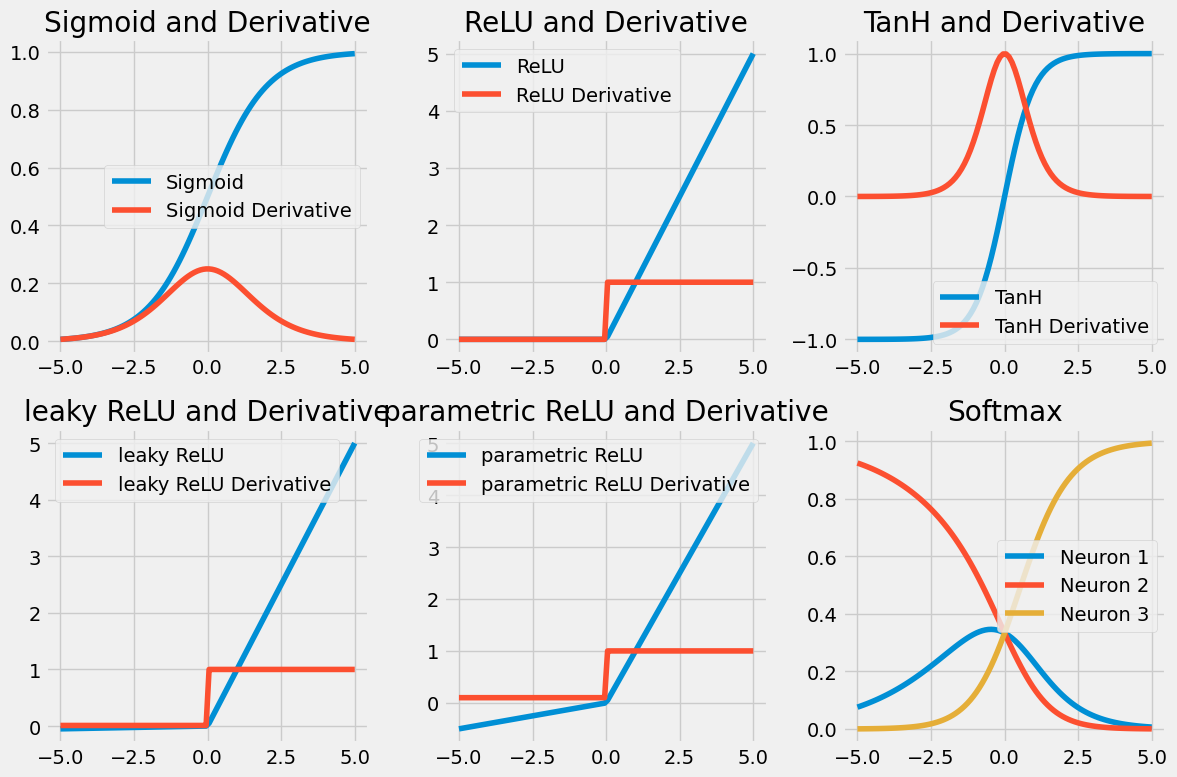

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# derivative of sigmoid activation function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# relu activation function
def relu(x):
    return np.maximum(0, x)

# derivative of relu activation function
def relu_derivative(x):
    return np.where(x <= 0, 0, 1)

# hyperbolic tangent(tanh) activation function
def tanh(x):
    return np.tanh(x)

# derivative of tanh activation function
def tanh_derivative(x):
    return 1 - np.square(tanh(x))

# leaky relu activation function
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

# derivative of leaky relu activation function
def leaky_relu_derivative(x, alpha=0.01):
    dx = np.ones_like(x)
    dx[x < 0] = alpha
    return dx

# parametric relu activation function
def parametric_relu(x, alpha=0.1):
    return np.where(x > 0, x, alpha * x)

# derivative of parametric relu
def parametric_relu_derivative(x, alpha=0.1):
    dx = np.ones_like(x)
    dx[x < 0] = alpha
    return dx

# softmax activation function
def softmax(x):
    exp_vals = np.exp(x - np.max(x, axis=0))
    return exp_vals / np.sum(exp_vals, axis=0)

# input values
x = np.linspace(-5, 5, 100)

# compute activation functions
sigmoid_y = sigmoid(x)
relu_y = relu(x)
tanh_y = tanh(x)
leaky_relu_y = leaky_relu(x)
parametric_relu_y = parametric_relu(x)
softmax_y = softmax(np.array([x, x / 2, x * 2]))

# compute derivatives
sigmoid_derivative_y = sigmoid_derivative(x)
relu_derivative_y = relu_derivative(x)
tanh_derivative_y = tanh_derivative(x)
leaky_relu_derivative_y = leaky_relu_derivative(x)
parametric_relu_derivative_y = parametric_relu_derivative(x)

# plotting the activation functions and their derivatives
plt.figure(figsize=(12,8))  # smaller size

plt.subplot(2, 3, 1)
plt.plot(x, sigmoid_y, label='Sigmoid')
plt.plot(x, sigmoid_derivative_y, label='Sigmoid Derivative')
plt.title("Sigmoid and Derivative")
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(x, relu_y, label='ReLU')
plt.plot(x, relu_derivative_y, label='ReLU Derivative')
plt.title("ReLU and Derivative")
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 3)
plt.plot(x, tanh_y, label='TanH')
plt.plot(x, tanh_derivative_y, label='TanH Derivative')
plt.title("TanH and Derivative")
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 4)
plt.plot(x, leaky_relu_y, label='leaky ReLU')
plt.plot(x, leaky_relu_derivative_y, label='leaky ReLU Derivative')
plt.title("leaky ReLU and Derivative")
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 5)
plt.plot(x, parametric_relu_y, label='parametric ReLU')
plt.plot(x, parametric_relu_derivative_y, label='parametric ReLU Derivative')
plt.title("parametric ReLU and Derivative")
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 6)
for i, y in enumerate(softmax_y):
    plt.plot(x, y, label=f'Neuron {i+1}')
plt.title("Softmax")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


REGRESSION USING ANN

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
housing = fetch_california_housing()

In [3]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
X = pd.DataFrame(housing.data,columns = housing.feature_names)

In [5]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
y = pd.DataFrame(housing.target,columns = ['target'])

In [7]:
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [8]:
X.shape

(20640, 8)

In [9]:
y.shape

(20640, 1)

In [10]:
X_train_full,X_test,y_train_full,y_test = train_test_split(X,y,random_state=42)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,random_state=42)

In [11]:
print(X_train_full.shape)
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(15480, 8)
(11610, 8)
(3870, 8)
(5160, 8)


In [12]:
X_train.shape[:1]

(11610,)

In [13]:
LAYERS = [
    tf.keras.layers.Dense(30, activation="relu",input_shape = X_train.shape[1:]),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(5,  activation="relu"),
    tf.keras.layers.Dense(1)
                          ]

C:\Users\Ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model = tf.keras.models.Sequential(LAYERS)

In [15]:
LOSS = 'mse'
OPTIMIZER ='sgd'

model.compile(optimizer = OPTIMIZER,loss = LOSS)

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [19]:
X_train

array([[-0.19397883, -1.07781319, -0.94338545, ..., -0.57291624,
         0.92926047, -1.42215523],
       [ 0.75198318, -1.868895  ,  0.40547793, ...,  0.20516532,
        -0.91654738,  1.09666969],
       [-0.41469108,  0.02970134,  0.81808819, ..., -0.29983271,
         1.30872858, -1.697027  ],
       ...,
       [-1.22332336,  0.50435042, -0.51600328, ...,  0.1344908 ,
        -0.71978613,  1.14664638],
       [-0.93556989,  1.8491895 , -0.10878451, ..., -0.01354498,
         0.52168361, -0.10277075],
       [ 0.89585991,  0.1879177 ,  0.29947528, ..., -0.17823425,
         1.12133692, -1.30720885]], shape=(11610, 8))

In [20]:
EPOCHS = 20 
history = model.fit(X_train,y_train,epochs = EPOCHS,validation_data = (X_valid,y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.9494 - val_loss: 0.5651
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4838 - val_loss: 0.4743
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4117 - val_loss: 0.4507
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3898 - val_loss: 0.4390
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3801 - val_loss: 0.4407
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3715 - val_loss: 0.4420
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3671 - val_loss: 0.4247
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3618 - val_loss: 0.4312
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3553 - val_loss: 0.4268
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3512 - val_loss: 0.4115
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3456 - val_loss: 0.4175
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [21]:
pd.DataFrame(history.history)

,loss,val_loss
0,0.949440,0.565086
1,0.483763,0.474285
2,0.411690,0.450668
3,0.389780,0.438986
4,0.380080,0.440653
5,0.371534,0.442044
6,0.367124,0.424716
7,0.361834,0.431245
8,0.355308,0.426804
9,0.351161,0.411509


<Axes: >

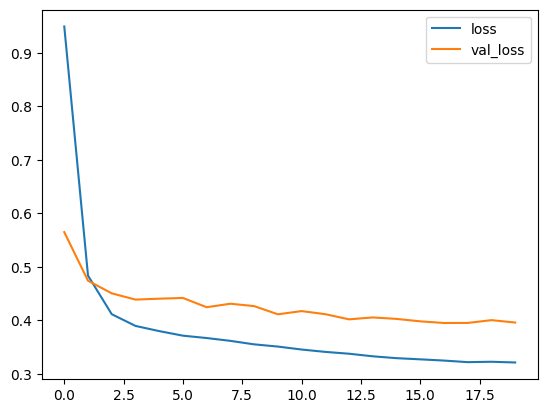

In [22]:
pd.DataFrame(history.history).plot()

In [23]:
model.evaluate(X_test,y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3920


0.39203712344169617

In [24]:
X_test.shape

(5160, 8)

In [25]:
new = X_test[0]

In [26]:
new

array([-1.14772246, -0.3014276 , -0.46356103, -0.13026842, -0.0249129 ,
        0.56243986,  0.22075674,  0.2580042 ])

In [27]:
new.reshape((1,8))

array([[-1.14772246, -0.3014276 , -0.46356103, -0.13026842, -0.0249129 ,
         0.56243986,  0.22075674,  0.2580042 ]])

In [28]:
model.predict(new.reshape((1,8)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


array([[0.77960014]], dtype=float32)

In [29]:
import tensorflow as tf

# ----------------------------------------
# 1) Build the Model
# ----------------------------------------
model_2 = tf.keras.models.Sequential(LAYERS)
# LAYERS should be defined earlier, e.g.:
# LAYERS = [
#     tf.keras.layers.Dense(64, activation="relu"),
#     tf.keras.layers.Dense(32, activation="relu"),
#     tf.keras.layers.Dense(1)
# ]


# ----------------------------------------
# 2) Compile Model
# ----------------------------------------
LOSS = "mse"   # Mean Squared Error for regression
OPTIMIZER = tf.keras.optimizers.SGD(learning_rate=1e-3)

model_2.compile(
    loss=LOSS,
    optimizer=OPTIMIZER
)


# ----------------------------------------
# 3) Training Settings
# ----------------------------------------
EPOCHS = 20


# ----------------------------------------
# 4) Callbacks
# ----------------------------------------

# Save the best model during training
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "my_model.keras",
    save_best_only=True
)

# Stop training early if validation loss doesn't improve
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=5,
    restore_best_weights=True
)

# Logs for TensorBoard visualization
tensorboard_cb = tf.keras.callbacks.TensorBoard(
    log_dir="logs"
)

CALLBACKS = [checkpoint_cb, early_stopping_cb, tensorboard_cb]


# ----------------------------------------
# 5) Train the Model
# ----------------------------------------
history = model_2.fit(
    X_train, y_train,
    epochs=EPOCHS,
    validation_data=(X_valid, y_valid),
    callbacks=CALLBACKS
)


Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3121 - val_loss: 0.3923
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3096 - val_loss: 0.3904
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3087 - val_loss: 0.3912
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3078 - val_loss: 0.3904
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3071 - val_loss: 0.3906
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3067 - val_loss: 0.3926
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3061 - val_loss: 0.3904
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3055 - val_loss: 0.3945
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3054 - val_loss: 0.3924


BATCH NORMALIZATION

In [1]:
#WITHOUT BATCH NORMALIZATION
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

#load and preprocess the data
(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0],-1)) / 255.0
X_test = X_test.reshape((X_test.shape[0],-1)) / 255.0

#define model 1: simple feed forward neural network
model1 =  Sequential([
    Dense(32, activation='relu',input_shape=(784,)),
    Dense(32,activation='relu'),
    Dense(10, activation='softmax')
])

#Compile model 1

model1.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

#print model 1 summary
model1.summary()

#train model
model1.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.1)

#evaluate model 1
test_loss, test_acc = model1.evaluate(X_test,y_test)
print("Model 1 - Test Accuracy:",test_acc)

C:\Users\Ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,506 (103.54 KB)

 Trainable params: 26,506 (103.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8889 - loss: 0.3800 - val_accuracy: 0.9512 - val_loss: 0.1737
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9439 - loss: 0.1904 - val_accuracy: 0.9637 - val_loss: 0.1415
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9567 - loss: 0.1459 - val_accuracy: 0.9653 - val_loss: 0.1201
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9631 - loss: 0.1201 - val_accuracy: 0.9675 - val_loss: 0.1108
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9684 - loss: 0.1033 - val_accuracy: 0.9708 - val_loss: 0.0962
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9715 - loss: 0.0916 - val_accuracy: 0.9697 - val_loss: 0.0988
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9754 - loss: 0.0817 - val_accuracy: 0.9665 - val_loss: 0.1153
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9774 - loss: 0.07

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

# Define model 2: with Batch Normalization
model2 = Sequential([
    Dense(32, activation='relu', input_shape=(784,)),
    BatchNormalization(),  # BatchNorm after first dense layer
    Dense(32, activation='relu'),
    BatchNormalization(),  # BatchNorm after second dense layer
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile model 2
model2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Print model summary
model2.summary()

# Train model 2
model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate model 2
test_loss, test_acc = model2.evaluate(X_test, y_test)
print("Model 2 - Test Accuracy:", test_acc)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,762 (104.54 KB)

 Trainable params: 26,634 (104.04 KB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8943 - loss: 0.3634 - val_accuracy: 0.9625 - val_loss: 0.1344
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9433 - loss: 0.1902 - val_accuracy: 0.9662 - val_loss: 0.1141
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9541 - loss: 0.1520 - val_accuracy: 0.9675 - val_loss: 0.1023
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9599 - loss: 0.1335 - val_accuracy: 0.9690 - val_loss: 0.1066
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9623 - loss: 0.1226 - val_accuracy: 0.9702 - val_loss: 0.1013
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9643 - loss: 0.1151 - val_accuracy: 0.9727 - val_loss: 0.0943
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9675 - loss: 0.1059 - val_accuracy: 0.9722 - val_loss: 0.0917
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9689 - loss: 0.099

REGULARIZATION

In [5]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error

#load the dataset
california_housing = fetch_california_housing()
X,y = california_housing.data,california_housing.target

#split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#standardize the feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#ridge regression
ridge = Ridge(alpha=0.1)
ridge .fit(X_train_scaled,y_train)
ridge_pred = ridge.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test,ridge_pred)
print("Ridge MSE:",ridge_mse)

#lasso regression
lasso = Lasso(alpha=0.1)
lasso .fit(X_train_scaled,y_train)
lasso_pred = lasso.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test,lasso_pred)
print("Lasso MSE:",lasso_mse)


#Elastic Net regression
elastic = ElasticNet(alpha=0.1)
elastic .fit(X_train_scaled,y_train)
elastic_pred = elastic.predict(X_test_scaled)
elastic_mse = mean_squared_error(y_test,elastic_pred)
print("Elastic MSE:",elastic_mse)

Ridge MSE: 0.555887913867418
Lasso MSE: 0.6796290284328821
Elastic MSE: 0.6358566879910775


NEURAL NETWORK - DROPOUT

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


#build the model
model = Sequential([
    Dense(64, activation='relu',input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2), #dropout layer for reglarization
    Dense(64, activation='relu'),
    Dense(1) #output layer
])

#compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse',metrics=['mse'])

#train the model
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2,verbose=0)

#Evaluate the model
test_loss,test_mse = model.evaluate(X_test_scaled,y_test)
print("Dropout Test MSE:",test_loss)
    

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2744 - mse: 0.2744
Dropout Test MSE: 0.2744479179382324


WEIGHT INITIALIZATION

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.initializers import glorot_uniform,he_uniform
from sklearn.model_selection import train_test_split


In [2]:
#Load the MNIST dataset
(X_train_full,y_train_full),(X_test,y_test) = mnist.load_data()
print(X_train_full)
print(y_train_full)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[5 0 4 ... 5 6 8]


In [3]:
#normalize the input data
X_train_full = X_train_full.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [4]:
#Flatten the input data
X_train_full = X_train_full.reshape((-1,28*28))
X_test = X_test.reshape((-1,28*28))

In [5]:
#split the full training set into training and validation sets
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=42)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import GlorotUniform

# define the model with Xavier (Glorot) initialization and tanh activation
model_xavier = Sequential([
    Dense(512, activation='tanh', kernel_initializer=GlorotUniform(), input_shape=(28*28,)),
    Dense(512, activation='tanh', kernel_initializer=GlorotUniform()),
    Dense(10, activation='softmax')
])


C:\Users\Ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
#compile the model
model_xavier.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
history_xavier = model_xavier.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_valid, y_valid)
)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9084 - loss: 0.3067 - val_accuracy: 0.9394 - val_loss: 0.1977
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9556 - loss: 0.1459 - val_accuracy: 0.9605 - val_loss: 0.1278
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9710 - loss: 0.0957 - val_accuracy: 0.9688 - val_loss: 0.1033
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9791 - loss: 0.0671 - val_accuracy: 0.9756 - val_loss: 0.0841
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9854 - loss: 0.0470 - val_accuracy: 0.9745 - val_loss: 0.0848
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.9889 - loss: 0.0364 - val_accuracy: 0.9772 - val_loss: 0.0764
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9927 - loss: 0.0248 - val_accuracy: 0.9774 - val_loss: 0.0775
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9944 - loss: 0.0199 - 

In [9]:
model_he = Sequential([
    Dense(512, activation='relu',kernel_initializer=he_uniform(),input_shape=(28*28,)),
    Dense(512, activation='relu',kernel_initializer=he_uniform()),
    Dense(10,activation='softmax')
])

In [10]:
model_he.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
history_he = model_he.fit(X_train,y_train,epochs=10,batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9296 - loss: 0.2360 - val_accuracy: 0.9652 - val_loss: 0.1143
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9741 - loss: 0.0846 - val_accuracy: 0.9703 - val_loss: 0.0969
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9839 - loss: 0.0519 - val_accuracy: 0.9710 - val_loss: 0.0938
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9883 - loss: 0.0366 - val_accuracy: 0.9761 - val_loss: 0.0844
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9926 - loss: 0.0234 - val_accuracy: 0.9775 - val_loss: 0.0785
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9933 - loss: 0.0200 - val_accuracy: 0.9779 - val_loss: 0.0825
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9934 - loss: 0.0195 - val_accuracy: 0.9796 - val_loss: 0.0839
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9950 - loss: 0.0157 - va

In [12]:
#print the final training and validation accuracies
print("Xavier Gloraat Initialization:")
print("Training Accuracy:",history_xavier.history['accuracy'][-1])
print("Validation Accuracy:",history_xavier.history['val_accuracy'][-1])
print("\nHe Initialization:")
print("Training Accuracy:", history_he.history['accuracy'][-1])
print("Validation Accuracy:",history_he.history['val_accuracy'][-1])

Xavier Gloraat Initialization:
Training Accuracy: 0.9973958134651184
Validation Accuracy: 0.9790833592414856

He Initialization:
Training Accuracy: 0.9956874847412109
Validation Accuracy: 0.9752500057220459


OPTIMIZERS

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam

#Load the mnist dataset
(X_train,y_train),(X_test,y_test) = mnist.load_data()

#Normalized the input dat
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

#flatten the input images
X_train = X_train.reshape((-1,28*28))
X_test = X_test.reshape((-1,28*28))

#define the model
model = Sequential([
    Dense(512, activation='relu',input_shape=(28*28,)),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

#compile the model with adam optimizer
adam_optimizer =Adam(learning_rate=0.001) #specify the learning rate
model.compile(optimizer=adam_optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#train the model
history = model.fit(X_train,y_train,epochs=10,batch_size=128,validation_data=(X_test,y_test))

#Evaluate the model on test dataset    
test_loss,test_accuracy = model.evaluate(X_test,y_test)

print("Test Accuracy:",test_accuracy)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9354 - loss: 0.2176 - val_accuracy: 0.9687 - val_loss: 0.1007
Epoch 2/10
454/469 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9757 - loss: 0.0827

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import SGD,RMSprop,Adagrad

#Load the mnist dataset
(X_train,y_train),(X_test,y_test) = mnist.load_data()

#Normalized the input dat
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

#flatten the input images
X_train = X_train.reshape((-1,28*28))
X_test = X_test.reshape((-1,28*28))

#define the model
model = Sequential([
    Dense(512, activation='relu',input_shape=(28*28,)),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

#compile model with differnent optimizers
optimizers = [
    SGD(learning_rate=0.01), #stochastic gradient descent
    RMSprop(learning_rate=0.001), #RMSprop
    Adagrad(learning_rate=0.01) #Adagrd
]
for optimizer in optimizers:
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    #Train the model
    history = model.fit(X_train,y_train,epochs=10,batch_size=128,validation_data=(X_test,y_test))

    #Evaluate the model on test data
    test_loss,test_accuracy = model.evaluate(X_test,y_test)
    print(f"optimizer:{optimizer.__class__.__name__}, Test Accuaracy: {test_accuracy}")